In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from PIL import Image
import pandas as pd

In [2]:
#load numpy zip
data = np.load('./data/dataframe_100_100_norm.npz')

In [3]:
data.files

['arr_0', 'arr_1']

In [4]:
X = data['arr_0']
y = data['arr_1']

In [5]:
X.shape, y.shape

((7283, 10000), (7283,))

# Eigen Image

In [6]:
X1 = X - X.mean(axis = 0) #subtracting all columns with the mean
#we get features of a face that are "not-mean" (features that help us differentiate faces)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None, whiten =True, svd_solver='auto')

In [8]:
x_pca = pca.fit_transform(X1)

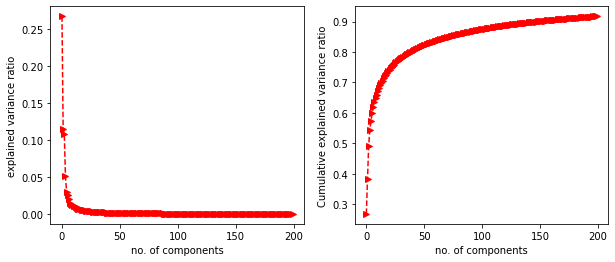

In [9]:
#elbow method to find optimum n_components

eigenRatio = pca.explained_variance_ratio_
eigenRatio_cum = np.cumsum(eigenRatio)

plt.figure(figsize=(10, 4))

# firts plot: the variance ratio for each component
plt.subplot(1, 2, 1)
plt.xlabel('no. of components')
plt.ylabel('explained variance ratio')
plt.plot(eigenRatio[:200], 'r>--')

#second plot: the cumulative variance ratio upon considering first n components
plt.subplot(1, 2, 2)
plt.xlabel('no. of components')
plt.ylabel('Cumulative explained variance ratio')
plt.plot(eigenRatio_cum[:200], 'r>--')


plt.show()

In [10]:
#so taking a min variance of 80% we will take 50 components
pca_50 = PCA(n_components = 50, whiten =True, svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)

In [11]:
#saving pca
import pickle
pickle.dump(pca_50, open('./model/pca_50.pickle', 'wb'))

In [14]:
#consider 50 components and inverse transform
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [15]:
#from these 10000 directions we will consider only 50 components, rest are being put as zero
x_pca_inv.shape

(7283, 10000)

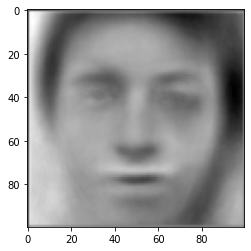

In [16]:
#consindering one image i.e first row
eig_img = x_pca_inv[0, :]
eig_img = eig_img.reshape((100, 100))
plt.imshow(eig_img, cmap='gray')

In [17]:
#saving
np.savez('./data/data_pca_50_y_Xmean.pickle',x_pca_50, y, X.mean(axis = 0))